# Series
- Pandas는 Panel Datas의 약자로 파이썬을 이용한 데이터 분석에서 가장 많이 사용되는 라이브러리
- Numpy기반으로 만들어졌으며 데이터 분석을 하기위한 효율적인 구조를 제공한다.
- Pandas의 자료구조
    - Series : 1차원 배열형태의 데이터 구조를 가진다. (벡터)
    - DataFrame : 2차원 배열형태의 데이터 구조를 가진다. 가장많이 쓰인다. (행렬)\
    행을 구분하는 index와 열을 구분하는 column이 있다.\
    별도로 행과 열을 지정해주지 않으면 인덱스는 리스트처럼 정수로 설정

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

## 시리즈 생성, 구조확인
- data, index로 구성할 수 있다.
- columns 옵션은 빠져있다. 이유는 벡터구조이기 때문이다.

In [5]:
# 시리즈 구조를 먼저 확인
Series?

Init signature:
Series(
    data=None,
    index=None,
    dtype=None,
    name=None,
    copy=False,
    fastpath=False,
)
Docstring:     
One-dimensional ndarray with axis labels (including time series).

Labels need not be unique but must be a hashable type. The object
supports both integer- and label-based indexing and provides a host of
methods for performing operations involving the index. Statistical
methods from ndarray have been overridden to automatically exclude
missing data (currently represented as NaN).

Operations between Series (+, -, /, *, **) align values based on their
associated index values-- they need not be the same length. The result
index will be the sorted union of the two indexes.

Parameters
----------
data : array-like, Iterable, dict, or scalar value
    Contains data stored in Series. If data is a dict, argument order is
    maintained.
index : array-like or Index (1d)
    Values must be hashable and have the same length as `data`.
    Non-unique index va

In [2]:
np.random.seed(100)
# 인덱스를 명시적으로 지정하지 않으면 자동적으로 0부터 정수로 지정한다.
# 인덱스를 명시적으로 지정할 때는 반드시 리스트 형태의 값으로 지정한다.
ser1 = Series(np.random.randint(10,20,5), index=list('abcde'))
print(ser1)

a    18
b    18
c    13
d    17
e    17
dtype: int32


In [3]:
print(ser1.index)
print(ser1.values)
print(ser1.dtype)

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
[18 18 13 17 17]
int32


## 시리즈값 조회
- 슬라이싱 방법
    - 1) 숫자사용 : 마지막 숫자는 포함 안됨
    - 2) 라벨사용 : 마지막 라벨은 포함시킨다.

In [4]:
ser1[2], ser1['c']

(13, 13)

In [5]:
print(ser1[1:4])
print(ser1['b':'d'])

b    18
c    13
d    17
dtype: int32
b    18
c    13
d    17
dtype: int32


In [6]:
# 응용 조회
ser1_1 = ser1[::2]
ser1_1

a    18
c    13
e    17
dtype: int32

## 시리즈 간의 연산

In [26]:
print(ser1)
print(ser1_1)

a    18
b    18
c    13
d    17
e    17
dtype: int32
a    18
c    13
e    17
dtype: int32


In [29]:
# NaN의 dtype이 float64 임.
result_ser = ser1 + ser1_1
print(result_ser)

a    36.0
b     NaN
c    26.0
d     NaN
e    34.0
dtype: float64


## 누락 데이터 조회하기
- isnull()
- notnull()

In [33]:
print(result_ser.isnull())
print(result_ser.notnull())
print('#'*40)
print(result_ser.isnull().sum()) # 결측값 갯수

a    False
b     True
c    False
d     True
e    False
dtype: bool
a     True
b    False
c     True
d    False
e     True
dtype: bool
########################################
2


In [39]:
print(result_ser[result_ser.isnull()])
print(result_ser[result_ser.notnull()])

b   NaN
d   NaN
dtype: float64
a    36.0
c    26.0
e    34.0
dtype: float64


# Pandas를 이용한 시각화
- 위에서 했던 작업을 좀더 보기좋게 시각화로 마무리해보자.
- 여러 데이터 중에서 누락데이터가 아닌것만 그래프로 표시

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline # 이건 내부에서 plt가 나오게 해주는 것

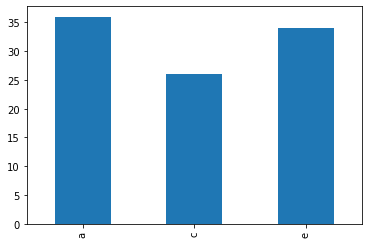

In [50]:
result_ser[result_ser.notnull()].plot(kind='bar')
plt.show()

<AxesSubplot:>

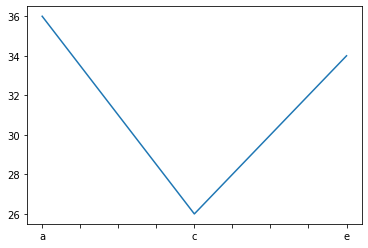

In [52]:
result_ser[result_ser.notnull()].plot()